In [8]:
import pandas
import matplotlib.pyplot as plt


In [9]:
df = pandas.read_csv('QueryResults.csv',  names=['DATE', 'TAG', 'POSTS'], header=0)

In [10]:
 # the first 5 rows ofthe dataframe
df.head()


,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,82
3,2008-08-01 00:00:00,c#,503
4,2008-08-01 00:00:00,c++,164


In [11]:
# the last 5 rows of the of the dataframe
df.tail()

,DATE,TAG,POSTS
2756,2025-02-01 00:00:00,php,438
2757,2025-02-01 00:00:00,python,2599
2758,2025-02-01 00:00:00,r,579
2759,2025-02-01 00:00:00,ruby,61
2760,2025-02-01 00:00:00,swift,390


In [12]:
# check how many rows and columns are in the dataframe. what is the dimension of the dataframe 
df.count()


DATE     2761
TAG      2761
POSTS    2761
dtype: int64

In [13]:
# dimension of dataframe
df.shape

(2761, 3)

In [14]:
# count the number of entries of row in the dataframe
df.count()

DATE     2761
TAG      2761
POSTS    2761
dtype: int64

In [15]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,199,199
c,199,199
c#,200,200
c++,199,199
delphi,199,199
go,184,184
java,199,199
javascript,199,199
perl,199,199


In [16]:
# the number of posts each programming language has
df.groupby('TAG').sum()

,DATE,POSTS
TAG,,
assembly,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,45025
c,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,407486
c#,2008-07-01 00:00:002008-08-01 00:00:002008-09-...,1624562
c++,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,813548
delphi,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,52411
go,2009-11-01 00:00:002009-12-01 00:00:002010-01-...,74290
java,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1919806
javascript,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2532080
perl,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,68310


In [17]:
# checking the data type of the date
type(df['DATE'][1])

str

In [18]:
# using pandas to convert the date data type(str) to datetime
date =(pandas.to_datetime(df['DATE'][1]))
print(date)
type(date)

2008-08-01 00:00:00


pandas._libs.tslibs.timestamps.Timestamp

In [19]:
# converting the entire column to datetime
df.DATE = pandas.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,82
3,2008-08-01,c#,503
4,2008-08-01,c++,164


In [20]:
# reshaping datafram
reshape_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
reshape_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2024-10-01,90.0,465.0,1589.0,916.0,85.0,177.0,1507.0,1875.0,21.0,650.0,3472.0,785.0,63.0,458.0
2024-11-01,98.0,401.0,1355.0,845.0,56.0,125.0,1259.0,1637.0,20.0,539.0,3138.0,694.0,75.0,386.0
2024-12-01,90.0,328.0,1091.0,689.0,42.0,114.0,1165.0,1388.0,24.0,428.0,2696.0,550.0,53.0,316.0
2025-01-01,68.0,328.0,1149.0,704.0,56.0,134.0,1175.0,1431.0,25.0,527.0,2744.0,529.0,50.0,345.0
2025-02-01,65.0,302.0,1128.0,752.0,64.0,118.0,1075.0,1390.0,18.0,438.0,2599.0,579.0,61.0,390.0


In [21]:
# dimension of dataset
reshape_df.shape

(200, 14)

In [22]:
# printing the all the columns in dataset
reshape_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [23]:
reshape_df.count()

TAG
assembly      199
c             199
c#            200
c++           199
delphi        199
go            184
java          199
javascript    199
perl          199
php           199
python        199
r             197
ruby          199
swift         190
dtype: int64

In [24]:
# replacing NaN values with 0
reshape_df.fillna(0, inplace=True)
reshape_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,82.0,503.0,164.0,13.0,0.0,220.0,160.0,28.0,157.0,119.0,0.0,68.0,0.0
2008-09-01,28.0,320.0,1640.0,753.0,104.0,0.0,1122.0,630.0,129.0,474.0,534.0,6.0,286.0,0.0
2008-10-01,16.0,303.0,1985.0,805.0,112.0,0.0,1145.0,720.0,128.0,603.0,505.0,0.0,246.0,0.0
2008-11-01,16.0,258.0,1729.0,733.0,139.0,0.0,953.0,581.0,97.0,497.0,447.0,1.0,154.0,0.0


In [25]:
# checking if there are still NaN values left in the dataframe
reshape_df.isna().values.any()


False

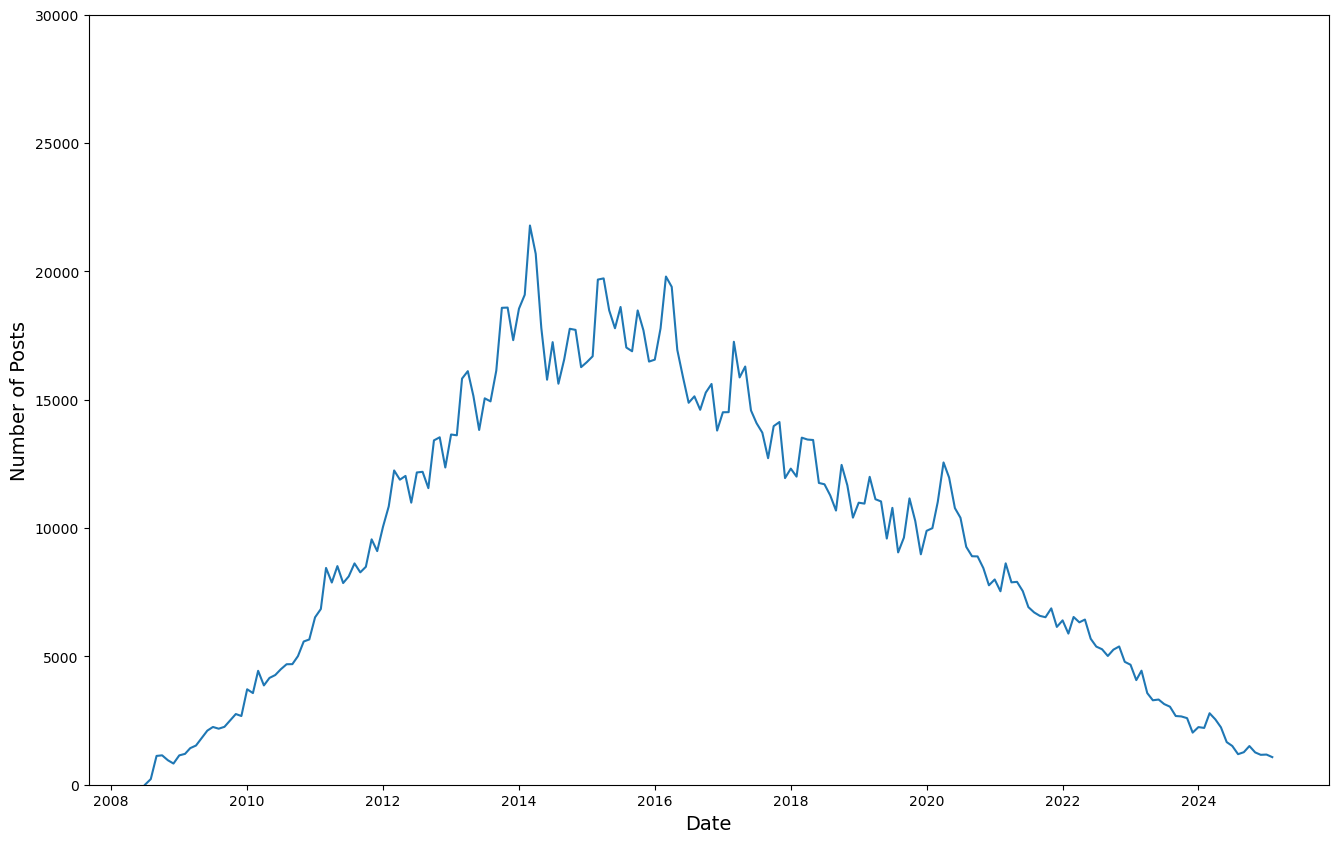

In [26]:
 # ploting the popularity of the Java programming language
plt.figure(figsize=(16,10))
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 30000)
plt.plot(reshape_df.index, reshape_df.java)

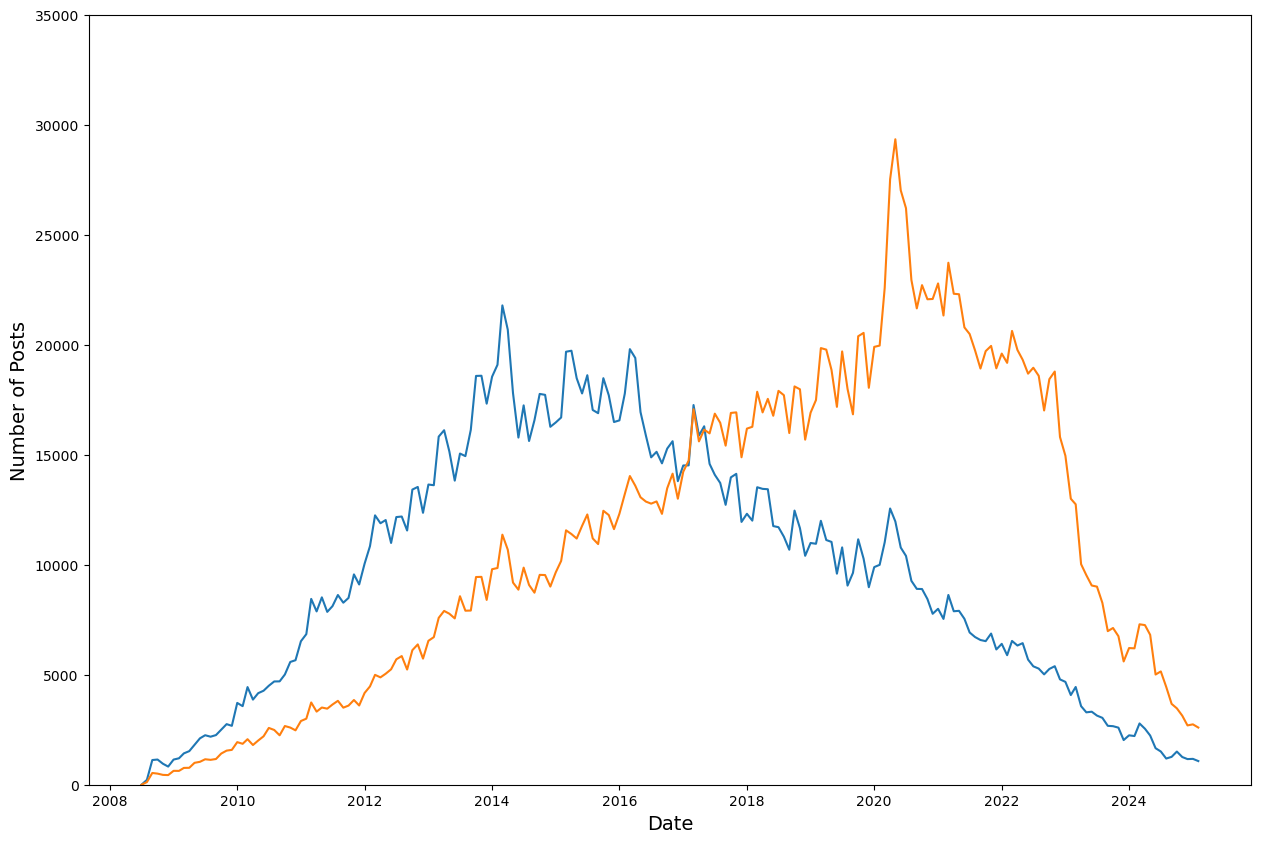

In [27]:
# ploting both Java and Python next to each other
plt.figure(figsize=(15,10))
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshape_df.index, reshape_df.java)
plt.plot(reshape_df.index, reshape_df.python)


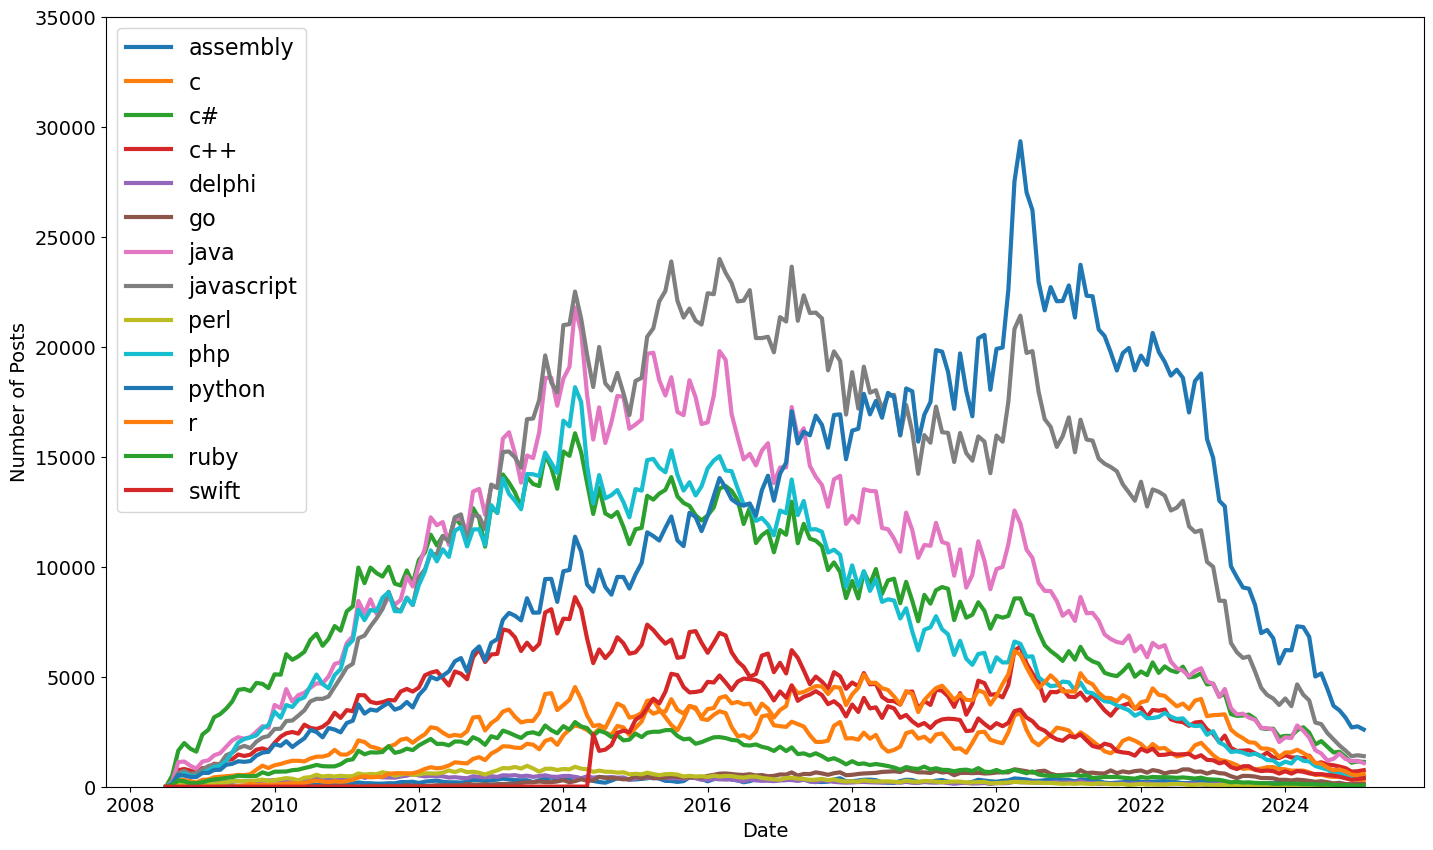

In [28]:
#  ploting for  all the programming languages on the same chart

plt.figure(figsize=(17,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
for column in reshape_df.columns:
    plt.plot(reshape_df.index, reshape_df[column],
            linewidth =3, label =reshape_df[column].name)
plt.legend(fontsize=16) 

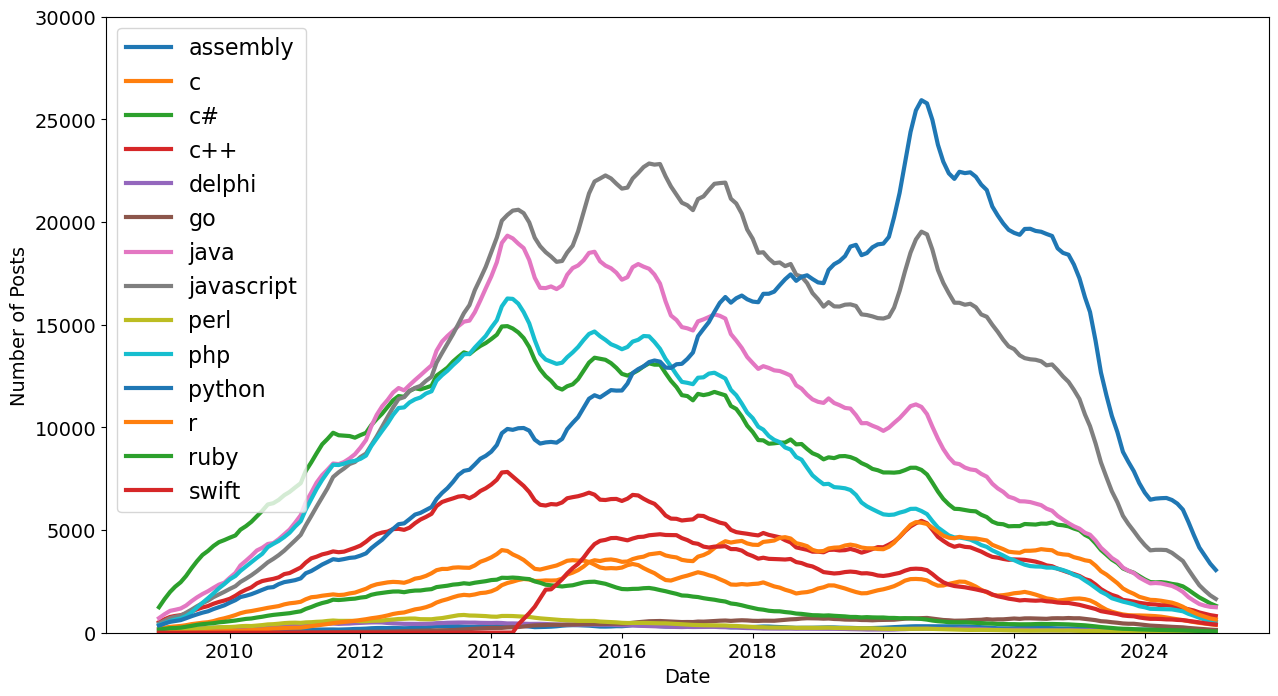

In [29]:
# filtering out the noise in the graph
roll_df = reshape_df.rolling(window=6).mean()
# The window is number of observations that are averaged

plt.figure(figsize=(15,8))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 30000)

# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)